Tim Zhao, PHYS 1600 Computational Physics HW2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Write a program to calculate and compare the behavior of two, nearly identical, non-linear pendulums. Use it to calculate the divergence of two nearby trajectories ($\Delta \theta$) in the chaotic regime and make a qualitative estimate of the corresponding Lyapunov exponent from the slope of a plot of log ($\Delta \theta$) as a function of $t$. Reasonable parameters to place the pendulum in the chaotic regime are: $l = g = 9.8,~\Omega_D = 0.6,~F_D=1.1,~\nu = 0.5$

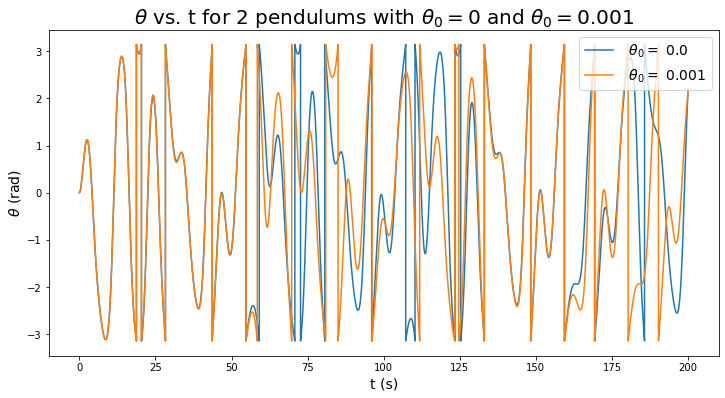

In [2]:
from Particle1D_2 import Pendulum
p1 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0, tf= 200, dt = 1e-3)
p2 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0.001, tf= 200, dt = 1e-3)
p1.scipy_trajectory()
p2.scipy_trajectory()

fig = plt.figure(figsize = [12,6])
plt.plot(p1.tarray, p1.xv[:,0], label = ' $\\theta_0 =$ {}'.format(0.0))
plt.plot(p2.tarray, p2.xv[:,0], label = ' $\\theta_0 =$ {}'.format(0.001))
plt.ylabel('$\\theta$ (rad)', fontsize = 14)
plt.xlabel('t (s)', fontsize = 14)
plt.legend(loc='best',fontsize=14)
plt.title('$\\theta$ vs. t for 2 pendulums with $\\theta_0 =0$ and $\\theta_0 =0.001$', fontsize = 20)
plt.show()

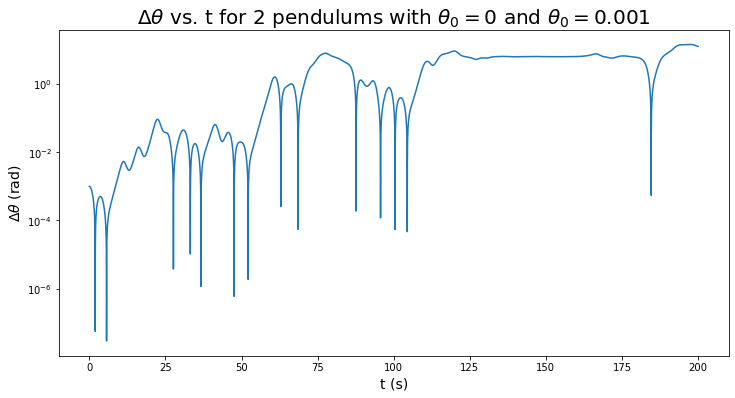

In [3]:
delta_theta1=np.abs(p1.xv_unwrap[:,0] - p2.xv_unwrap[:,0])

fig = plt.figure(figsize = [12,6])
plt.semilogy(p1.tarray, delta_theta1,)
plt.ylabel('$\Delta \\theta$ (rad)', fontsize = 14)
plt.xlabel('t (s)', fontsize = 14)
plt.title('$\Delta \\theta$ vs. t for 2 pendulums with $\\theta_0 =0$ and $\\theta_0 =0.001$', fontsize=20)
plt.show()

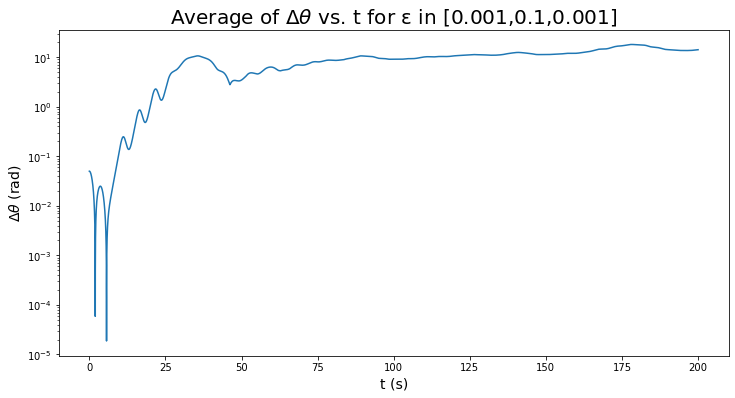

In [4]:
epsilon=np.arange(0.001,0.1,0.001)
for e in epsilon:
    if e == epsilon[0]:
        p1 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0.0, tf= 200, dt = 1e-3)
        p2 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0.0+e, tf= 200, dt = 1e-3)
        p1.scipy_trajectory()
        p2.scipy_trajectory()
        tot_diff=np.abs(p1.xv_unwrap[:,0] - p2.xv_unwrap[:,0])
    else:
        p1 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0.0, tf= 200, dt = 1e-3)
        p2 = Pendulum(l=9.8, omega_d= 0.6, Fd=1.1, nu = 0.5, x0 = 0.0+e, tf= 200, dt = 1e-3)
        p1.scipy_trajectory()
        p2.scipy_trajectory()
        tot_diff+=np.abs(p1.xv_unwrap[:,0] - p2.xv_unwrap[:,0])

avg_diff=tot_diff/len(epsilon)
fig = plt.figure(figsize = [12,6])
plt.semilogy(p1.tarray, avg_diff)
plt.ylabel('$\Delta \\theta$ (rad)', fontsize = 14)
plt.xlabel('t (s)', fontsize = 14)
plt.title('Average of $\Delta \\theta$ vs. t for \u03B5 in [0.001,0.1,0.001]',fontsize=20)
plt.show()

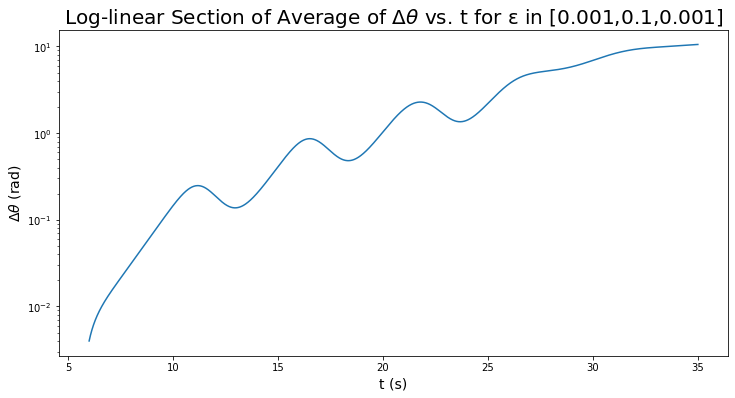

In [5]:
lower_bound=int(6/1e-3)
upper_bound=int(35/1e-3)
t=p1.tarray[lower_bound:upper_bound]
linear_section=avg_diff[lower_bound:upper_bound]

fig = plt.figure(figsize = [12,6])
plt.semilogy(t, linear_section)
plt.ylabel('$\Delta \\theta$ (rad)', fontsize = 14)
plt.xlabel('t (s)', fontsize = 14)
plt.title('Log-linear Section of Average of $\Delta \\theta$ vs. t for \u03B5 in [0.001,0.1,0.001]',fontsize=20)
plt.show()

Looking at the linear section of the average of $log(\Delta \theta)$ vs. $t$ graph, I estimate Lyapunov Exponent $\lambda \approx 7 > 0$, which means the system is chaotic as $\theta$ of the 2 nearly identical pendulums diverge.

2. Calculate Poincaré sections for the pendulum as it undergoes the period-doubling route to chaos. Plot $\omega$ versus $\theta$, with one point plotted for each drive cycle. Do this for $F_D =$ 1.4, 1.44, 1.465, 1.481, and 1.49 using the parameters $l = g = 9.8,~\Omega_D = 2/3,~\nu = 0.5,~\omega(0) = 0,~\theta(0) = 0.2$. You should find that the attractor in the period 1 regime will contain only a single point. Likewise, if the behavior is period $n$ the attractor will contain $n$ discrete points. Be careful to remove the points corresponding to the initial transient. You must also be careful to account for the fact that time increases in discrete steps of $\Delta t$, so you will actually extract points for your Poincar ́e section when $\lvert t - 2n\pi/\Omega_D \rvert < \Delta t/2$. Use a step size of $\Delta t = 0.005$ or smaller for this problem.

In [14]:
def poincare_section(Fd):
    p = Pendulum(l=9.8, omega_d= 2/3, nu = 0.5, v0=0, x0 = 0.2, tf= 1000, dt = 0.001,  Fd=Fd,)
    p.scipy_trajectory()
    poincare_t=[]
    poincare_x=[]
    poincare_v=[]

    #remove transient
    n=10
    
    for ii in range(len(p.tarray)):
        if np.abs(p.tarray[ii]-2*n*np.pi/p.omega_d) < (p.dt/2):
            poincare_t.append(p.tarray[ii])
            poincare_x.append(p.xv[ii,0])
            poincare_v.append(p.xv[ii,1])
            n+=1
    
    poincare_t=np.array(poincare_t)
    poincare_x=np.array(poincare_x)
    poincare_v=np.array(poincare_v)
    
    return poincare_t, poincare_x, poincare_v

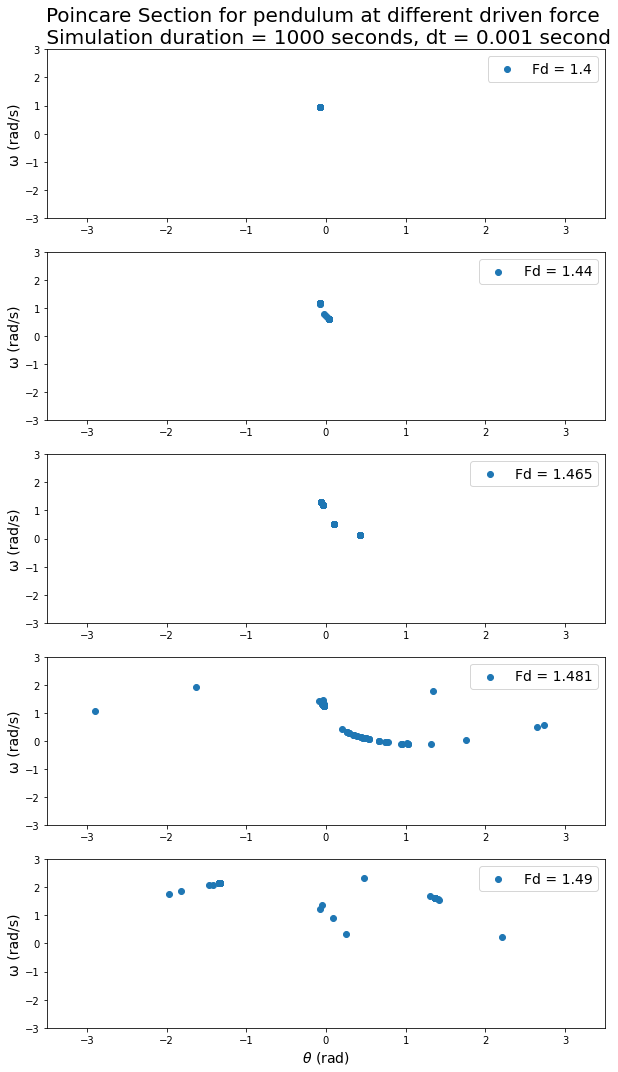

In [15]:
Fd=[1.4,1.44,1.465,1.481,1.49]

fig = plt.figure(figsize = [10,18])
axs = fig.subplots(len(Fd),1)

for ii in range(len(Fd)):  
    t,x,v=poincare_section(Fd[ii])
    axs[ii].scatter(x,v, label = 'Fd = {}'.format(Fd[ii]))
    axs[ii].set_ylabel('\u03C9 (rad/s)', fontsize = 14)
    axs[ii].set_ylim(-3,3)
    axs[ii].set_xlim(-3.5,3.5)
    axs[ii].legend(fontsize=14)
axs[-1].set_xlabel('$\\theta$ (rad)', fontsize = 14)
axs[0].set_title('Poincare Section for pendulum at different driven force \n Simulation duration = 1000 seconds, dt = 0.001 second',fontsize=20)

plt.show()

3. The logistic map undergoes successive period doubling as $\mu$ is increased from below 3 and finally develops fully chaotic behavior at $\mu \approx 3.56$. Compute the bifurcation diagram for the logistic map. Use numerical results for the logistic map to estimate the value of the Feigenbaum parameter $\delta$ and compare it with the value for the pendulum $\delta \approx 4.669$. You should be able to get a fairly good estimate if you look at the first eight bifurcations.

 mu = 3.0095047523761878 
 attractors: [0.63 0.7 ] 

 mu = 3.4497248624312156 
 attractors: [0.43 0.44 0.45 0.85] 

 mu = 3.5477738869434714 
 attractors: [0.36 0.37 0.51 0.54 0.81 0.83 0.88 0.89] 

Feigenbaum number = 4.4898


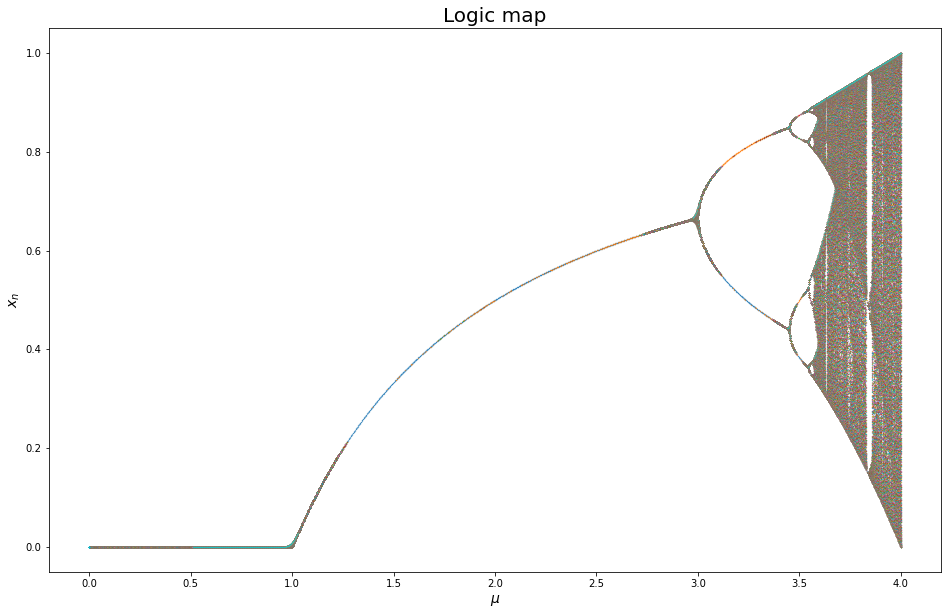

In [12]:
import LogisticMap as lm
# Generate a bifrucation diagram
mu_start = 0
mu_stop = 4
mu_steps = 2000
x0 = 0.8

# Generate an array of mu values
mus = np.linspace(mu_start, mu_stop, mu_steps)
  
# containers for mu values and logistic map values
m_list = np.zeros((len(mus), mu_steps))
mu_list = np.zeros((len(mus), mu_steps))

# counting feigenbaum number
bif_counter=2
bif_mus=[]

# loop over the mu values
for i in range(len(mus)):
    # generate a time trace for the logistic map at a given mu
    m = lm.LogisticMap(x0, mu = mus[i])
    
    # initialize method removes transient
    m.initialize(100)
    m.iterate(1000)
        
    # convert list to numpy array object
    m_points = np.unique(np.array(m.xList))
    
    #!!!!!ADD YOUR CODE HERE to select key points from time trace here
    mu_list[i,:len(m_points)] = mus[i]
    m_list[i,:len(m_points)] = m_points
    
    #find mu where doubling happens
    bif=np.unique(np.around(m_points,2))
    if len(bif)==bif_counter and np.abs(bif[-1]-bif[0])>0.02:
        bif_mus.append(mus[i])
        bif_counter*=2
        print(' mu = {}'.format(mus[i]),'\n', 'attractors: {}'.format(bif), '\n')

fig = plt.figure(figsize = [16,10])
plt.plot(mu_list, m_list,'.', markersize = 0.5)
plt.xlabel('$\mu$', fontsize=14)
plt.ylabel('$x_n$', fontsize=14)
plt.title('Logic map', fontsize=20)

feigenbaum=(bif_mus[-2]-bif_mus[-3])/(bif_mus[-1]-bif_mus[-2])
print('Feigenbaum number = {}'.format(round(feigenbaum,4)))

One problem that I encoutnered when finding the Feigenbaum number is that np.unique can not distinguish float data that are very close to each other. I used np.round() to round LogisticMap.xList to fewer decimal places, which worked up to $n = 8$. However, as the system enters chaotic regime shortly after $\mu = 3.54$, rounding error begins to dominate. I thought about writing a function to identify clusters of data in a np.array, but as the number of attractor blows up, I could not figure our how to identify doubling. 